In [1]:
import sys
sys.path.append("../utils")
from imgload import *
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import math

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

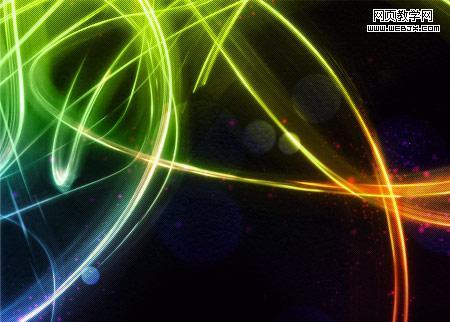

In [2]:

url_path = 'https://img1.baidu.com/it/u=1990515162,4001434732&fm=253&fmt=auto&app=138&f=JPEG?w=450&h=322'

ori_img = url2img(url_path)

cv2pil(ori_img)

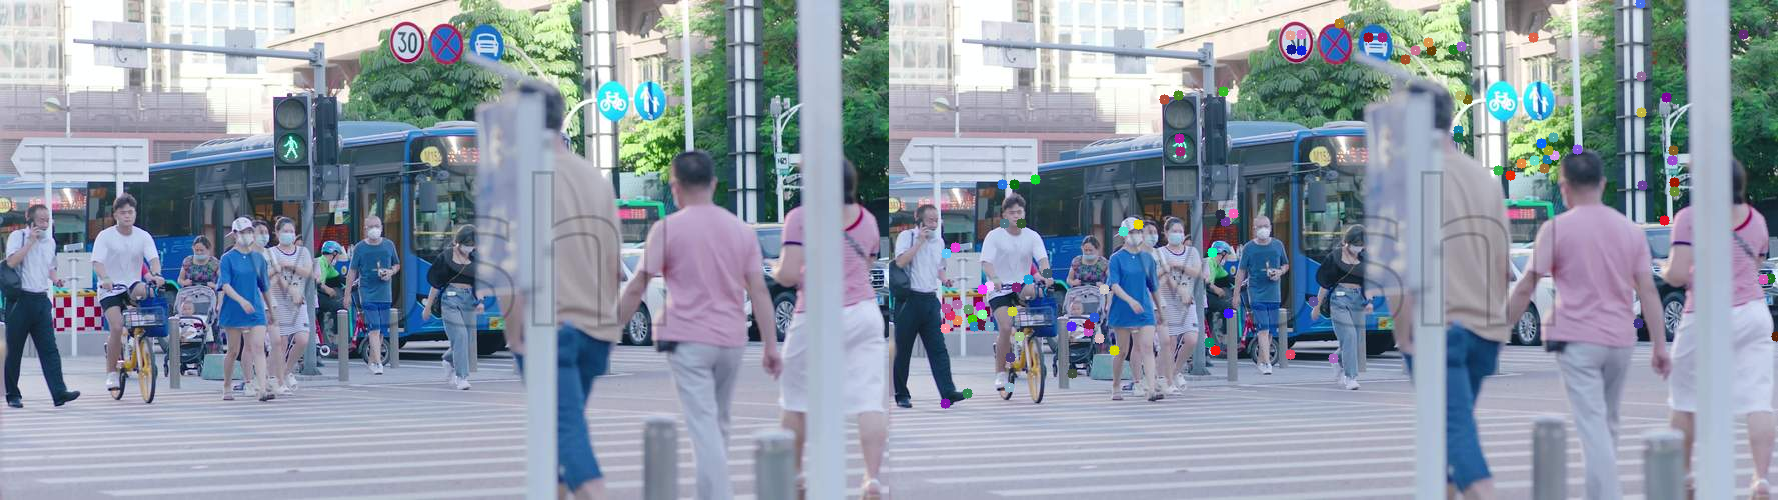

In [18]:
url_path = 'https://img2.baidu.com/it/u=602897902,1757413357&fm=253&fmt=auto&app=138&f=JPEG?w=500&h=333'

url_path = 'https://img1.baidu.com/it/u=681934324,621431638&fm=253&fmt=auto&app=138&f=JPEG?w=500&h=333'
url_path = 'https://img0.baidu.com/it/u=3909136053,2301493036&fm=253&fmt=auto&app=138&f=JPEG?w=889&h=500'

ori_img = url2img(url_path)

img = ori_img.copy()
color = np.random.randint(0,255,(100,3)) ### 随机颜色
lk_params = dict( winSize = (15,15), maxLevel = 2,
                criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

feature_params = dict( maxCorners = 100,
                qualityLevel = 0.3,
                minDistance = 7,
                blockSize = 7 )


old_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
mask = np.zeros_like(img, np.uint8)
frame_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
good_new = p1[st==1]
good_old = p0[st==1]
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    [a,b,c,d] = map(int, [a,b,c,d])
    mask = cv2.line(mask, (a, b), (c, d), color[i].tolist() )
    frame = cv2.circle(img, (a, b), 5, color[i].tolist(), -1)    

img = cv2.add(frame, mask)

mat = np.hstack((ori_img, img))
cv2pil(mat)


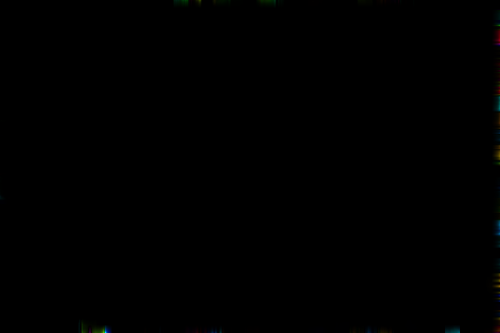

In [17]:
url_path = 'https://img2.baidu.com/it/u=602897902,1757413357&fm=253&fmt=auto&app=138&f=JPEG?w=500&h=333'
# url_path = 'https://img1.baidu.com/it/u=681934324,621431638&fm=253&fmt=auto&app=138&f=JPEG?w=500&h=333'
# url_path = 'https://img0.baidu.com/it/u=3909136053,2301493036&fm=253&fmt=auto&app=138&f=JPEG?w=889&h=500'

ori_img = url2img(url_path)

prvs = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(ori_img)
hsv[...,1] = 255

next = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

cv2pil(rgb)

